In [1]:
# In this file, we splited typical and non-typical participants as training and testing dataset. 
# The model we used is 30-dimensional latent variable space autoencoder model with ‘relu’ activation function

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_csv("Data/ML_GRF_stance_N_subset.csv")
df1 = df1.drop('ID2',1)
df1

/var/folders/tg/lxlq3g6n3w5fk_7n_xq3hh380000gn/T/ipykernel_49411/2319546634.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df1 = df1.drop('ID2',1)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
0,3.591,2.30980,1.30420,1.544600,0.99642,-0.86461,-1.8383,-3.34520,-5.4749,-8.6983,...,2.4066,2.31010,2.44570,2.7795,2.54120,2.6060,2.2587,2.8207,3.6663,2.977
1,2.199,0.30152,-0.49052,-0.002909,0.89121,0.30170,-2.7868,-6.95390,-9.0650,-8.6581,...,-2.6806,-1.52520,-0.81006,-1.4067,-0.30921,1.4658,1.6661,2.5326,2.9095,3.889
2,4.317,1.07650,-0.75328,0.764090,-0.55040,-3.91910,-7.3576,-10.71500,-12.6630,-11.4040,...,19.6700,17.28500,13.19600,10.5000,8.78740,7.5012,7.3930,6.2177,5.0284,4.098
3,3.310,0.52531,1.30960,0.409730,-2.29800,-5.33850,-9.7976,-12.07200,-12.3320,-10.2080,...,7.8613,7.05710,6.05990,4.8255,4.89040,5.4780,5.8122,6.0775,3.7969,4.605
4,1.821,-1.24800,-5.39700,-6.074400,-5.49380,-8.26350,-9.4401,-9.57430,-9.1991,-5.4045,...,17.5130,16.00400,13.37500,12.1960,9.85130,10.2140,8.3698,7.0593,6.6789,5.439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12747,-0.434,4.50740,5.93060,-2.600900,-14.79000,-21.28800,-24.8200,-21.49100,-24.4130,-20.9730,...,1.5590,-0.46055,0.12782,3.0011,5.22610,6.6191,7.3697,6.1280,4.3417,2.069
12748,1.164,4.43190,6.86710,-1.672000,-13.79200,-16.55900,-19.6420,-15.64400,-15.9730,-11.9680,...,16.6990,15.46100,14.13000,12.3930,9.90540,11.1470,10.2610,9.6713,7.0213,4.497
12749,4.382,6.59760,10.75200,9.721600,8.98050,1.87340,-6.8512,-11.07200,-13.6950,-13.3810,...,7.4279,4.48850,4.43140,6.7222,9.92060,8.3431,9.4538,8.9652,8.4592,4.879
12750,2.034,4.12090,9.56290,10.201000,4.41000,0.35724,-2.6013,-0.57981,-2.3533,-2.0854,...,12.7620,11.09300,9.80270,10.3710,11.67700,10.8000,10.5260,10.5630,8.7945,5.286


In [4]:
df2 = pd.read_csv("Data/ML_GRF_stance_N_outlier.csv")
df2 = df2.drop('ID2',1)
df2

/var/folders/tg/lxlq3g6n3w5fk_7n_xq3hh380000gn/T/ipykernel_49411/3585751574.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df2 = df2.drop('ID2',1)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
0,0.021,3.0162,-0.81844,-8.89270,-10.48700,-12.3590,-14.4200,-18.7710,-19.3980,-16.10200,...,-6.75940,-8.12040,-7.82130,-7.54850,-6.64010,-4.97750,-6.18880,-5.28830,-4.5082,-3.807
1,0.147,1.7636,-2.97610,-6.08910,-11.29600,-14.9640,-18.5100,-20.1410,-19.1230,-16.38500,...,15.28600,12.16400,9.85640,8.66860,7.48980,6.50500,7.05480,5.11330,4.2052,3.465
2,1.593,-8.5376,-12.98600,-28.85900,-24.30000,-16.3350,-8.3953,-3.9667,-6.9380,0.45591,...,13.14700,6.86000,3.79010,1.31720,-1.14570,-1.59060,-0.74112,0.84560,1.6911,0.424
3,-3.543,-7.7014,-8.05010,-35.87200,-61.87800,-45.4830,-45.6890,-41.6360,-41.0160,-25.20100,...,13.36600,7.15480,2.98300,-1.92600,-2.56270,-2.83250,-3.63090,-4.03740,-4.4692,-4.071
4,0.368,-9.6953,-15.13000,-31.05200,-22.62400,-14.7320,-6.1482,-12.1620,-15.1730,-15.33000,...,-0.98473,-3.77740,-6.08520,-7.35470,-8.23900,-7.85070,-5.66160,-3.72630,-2.0233,-2.660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,0.200,2.9172,1.24840,-8.53980,-18.53100,-26.5580,-33.2530,-39.4330,-42.4730,-40.00800,...,-5.06590,-4.50120,-5.39670,-5.46920,-2.76740,-1.30770,-0.34121,-0.15875,1.0236,1.165
2940,5.915,12.4600,23.89800,21.15500,0.48018,-12.6690,-18.0160,-23.8110,-27.7690,-22.86100,...,22.24200,11.75600,4.94570,2.53940,-0.94836,0.67391,6.21670,5.09310,6.4077,6.042
2941,-2.430,1.4202,4.81570,6.47910,5.62500,9.3313,11.8630,10.1870,3.7581,-0.97891,...,4.86250,3.00290,4.68730,3.93240,4.29570,3.37610,2.53290,2.29890,2.1196,0.854
2942,-1.106,-0.5330,-2.03000,-2.06990,-0.12273,-0.1550,-8.1966,-15.4030,-17.1340,-15.01100,...,0.24882,-0.14864,0.69427,0.91791,-0.50345,0.52718,0.59427,1.35870,1.4064,2.176


In [5]:
from keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras import Input, Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from numpy.random import seed
seed(42)
from tensorflow import random
random.set_seed(42)

In [6]:
encoding_dim = 30
input_data = Input(shape=(100,))

# encoded representation of input
encoded = Dense(encoding_dim, activation='relu')(input_data)
encoded_2 = Dense(200, activation='relu')(encoded)
encoded_3 = Dense(300, activation='relu')(encoded_2)
encoded_4 = Dense(encoding_dim, activation='relu')(encoded_3)
decoded_2 = Dense(200, activation='relu')(encoded_4)
decoded_1 = Dense(300, activation='relu')(decoded_2)
x2 = Dense(300, activation='relu')(decoded_1)
# decoded representation of code 
decoded = Dense(100)(x2)
# Model which take input image and shows decoded images
autoencoder = Model(input_data, decoded)

Metal device set to: Apple M1


2022-05-05 16:58:49.470677: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-05 16:58:49.472115: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
autoencoder.compile(optimizer='adam', loss='mse')

In [20]:
data1 = np.array(df1)
data2 = np.array(df2)


In [21]:
X_train = data1
X_test = data2

In [22]:
print(X_train.shape)
print(X_test.shape)

(12752, 100)
(2944, 100)


In [23]:
n_epochs = 800

In [35]:
history = autoencoder.fit(X_train, X_train,
                epochs=n_epochs,
                batch_size=256,
                validation_data=(X_test, X_test),
                         verbose = False)

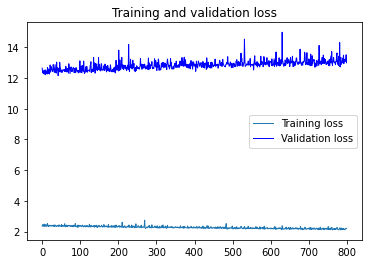

In [36]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(n_epochs)
plt.figure()
plt.plot(epochs, loss, '-', label='Training loss', lw=1)
plt.plot(epochs, val_loss, 'b', label='Validation loss', lw=1)
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.close()

In [37]:
decoded_data = autoencoder(X_test)

In [38]:
decoded_data.shape

TensorShape([2944, 100])

# Example 1

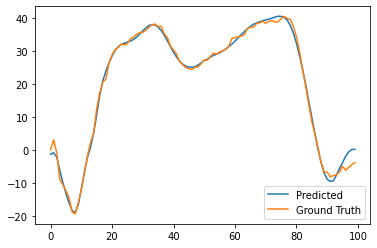

In [39]:
xx = np.arange(0,100)
plt.plot(xx, decoded_data[0], label="Predicted")
plt.plot(xx, X_test[0], label="Ground Truth")
plt.legend()
plt.show()

# Example 2

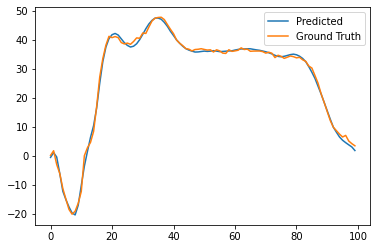

In [40]:
xx = np.arange(0,100)
plt.plot(xx, decoded_data[1], label="Predicted")
plt.plot(xx, X_test[1], label="Ground Truth")
plt.legend()
plt.show()

# Example 3

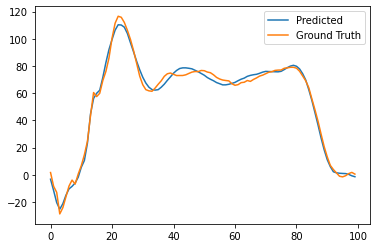

In [41]:
xx = np.arange(0,100)
plt.plot(xx, decoded_data[2], label="Predicted")
plt.plot(xx, X_test[2], label="Ground Truth")
plt.legend()
plt.show()

In [42]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

#mean_squared_error(X_test, decoded_data)

r2 = r2_score(X_test, decoded_data)
rmse = sqrt(mean_squared_error(X_test, decoded_data))

# RMSE normalised by mean:
nrmse = rmse/sqrt(np.mean(X_test**2))

In [43]:
r2

0.9362995837409863

In [44]:
rmse

3.604779967370403

In [45]:
nrmse

0.0768882968385951